# 簡単なテストのデータを使用した次元削減

In [5]:
import pandas as pd
import numpy as np
df_test =  pd.read_csv("test.csv") 
df_test

,name,math,science,japanese,english,society
0,tanaka,89,90,67,46,50
1,sato,57,70,80,85,90
2,suzuki,80,90,35,40,50
3,honda,40,60,50,45,55
4,kawabata,78,85,45,55,60
5,yoshino,55,65,80,75,85
6,saito,90,85,88,92,95


In [20]:
from sklearn.decomposition import PCA

# PCAのインスタンスを生成
pca = PCA(n_components = 2)

[:,1:].values →　2列目以降のデータを代入　<br>
[:,0].values →　1列目のデータを代入

In [21]:
X, y = df_test.iloc[:, 1:].values, df_test.iloc[:, 0].values

#### 主成分分析にデータを適用

In [24]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [26]:
pca.n_components_

2

#### 寄与率：各主成分の重要性を示している

In [27]:
pca.explained_variance_ratio_

array([ 0.6688013 ,  0.28791087])

#### 因子負荷量：pcaに適用後の行列　<br>
#### 1行目　→　第一主成分　<br>
#### 2行目　→　第二主成分　<br>
#### それぞれの列がそれぞれの変数の順番になってる　ex) 一番左が算数　　<br>
#### 0.5以上が負荷率が高い　→　1,2変数と　3,4,5変数に分けられる


In [28]:
pca.components_

array([[-0.04318455, -0.11661043,  0.55136578,  0.60073709,  0.56537406],
       [-0.84543226, -0.51948621, -0.08791982, -0.08720053,  0.00667425]])

#### 累積寄与率：主成分の寄与率を足したもの　<br>
#### 左が1つ目の成分で表せられるデータの割合　<br>
#### 右が2つ目の成分で表せられるデータの割合

In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([ 0.6688013 ,  0.95671218])

#### データを主成分空間に写像＝次元圧縮

In [31]:
x = pca.transform(X)
x

array([[-21.21097689, -21.47715546],
       [ 35.71460142,  11.68959258],
       [-42.0704435 , -10.53162768],
       [-22.74370588,  37.14882026],
       [-21.22256751,  -8.3637958 ],
       [ 27.54978153,  16.81652223],
       [ 43.98331082, -25.28235614]])

In [73]:
from matplotlib import pyplot
plt.figure(figsize=(5,5))

C:\Users\logma\python\Anaconda3\lib\site-packages\matplotlib\legend.py:326: UserWarning: Unrecognized location "bottom left". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  six.iterkeys(self.codes))))


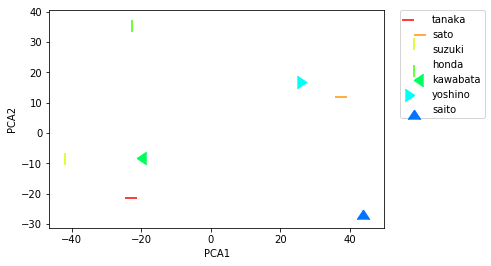

In [78]:
colors = [pyplot.cm.hsv(0.1 * i ,1) for i in range(len(df_test.name))]

for i in range(len(df_test.name)):
    pyplot.scatter(x[i,0] , x[i,1], c = colors[i] , marker=i, s = 150 , label = df_test.name[i])


plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.legend(bbox_to_anchor=(1.3, 1), loc='bottom left', borderaxespad=0)

pyplot.show()


#### グラフからわかること　<br>
第一成分　→　文系科目　<br>
第二成分　→　理系科目<br>
<br>
saito →　文系科目が強い<br>
kawabata →　理系が強い<br>
sato , yoshino →　どちらもそこそこ